### Exercise 0: Dataset preprocessing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Downloads/tic-tac-toe.data', header=None) #Read the required csv file and store it
df.columns = ["top-left-square","top-middle-square","top-right-square","middle-left-square","middle-middle-square","middle-right-square","bottom-left-square","bottom-middle-square","bottom-right-square","Class"]

df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


Converting any non-numeric values to numeric values
using hot-one encoding. Here we use the function get_dummies to create dummy features so as to divide the categorical values to each feature. Then we can represent it in binary format. So the number of columns increases. The target column also gets divided into 2 - Class_positive and Class_negative. We need to take only one class as y since they are complimentary


In [2]:
df = pd.get_dummies(df) 



An unbalanced dataset is one in which the target variable has more observations in one specific class than the others

In [3]:
count = df[["Class_positive"]].value_counts()
print(count)

Class_positive
1                 626
0                 332
dtype: int64


We observe that the positive class occurs 626 times while negative class occurs 332 times.Hence dataset is unbalanced.

We apply stratified sampling to obtain the training data sets so as to retain the proportion. Here we take 80% of the data for training. If sampling is not used, then the learning may become biased.

In [4]:
df_train = df.groupby('Class_positive', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state = 3116))

df_train

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Class_negative,Class_positive
944,0,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
928,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
775,0,1,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
827,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
853,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,0,1,0,0,1,0,0,1,1,...,1,0,0,0,1,0,1,0,0,1
557,1,0,0,0,1,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
287,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [5]:
train_index = df_train.index
df_test = df.drop(train_index) #dropping the training data to get test data
df_test

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Class_negative,Class_positive
7,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
12,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
13,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
15,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
29,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
934,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
935,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
949,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0


Converting to numpy arrays and creating target vectors using one of the class columns

In [6]:
y_train = np.array(df_train[['Class_positive']]) 
# putting the target feature to y array - taking only class positive as its redundant
x_train = np.array(df_train.drop(['Class_positive','Class_negative'],axis =1))

y_test = np.array(df_test[['Class_positive']]) 
x_test = np.array(df_test.drop(['Class_positive','Class_negative'],axis =1))

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)



(767, 1)
(767, 27)
(191, 1)
(191, 27)


##### Function to implement bolddriver steplength algorithm - Here steplength is increased/decreased by a factor depending on the log likelihood values.

In [7]:
def steplength_bolddriver(mu,log,log_new):
    
    decay = 0.5
    increase = 1.1        
    mu = mu * increase 
    if(log < log_new):     # checking current log likelihood and new log likelihood values
        
        mu = mu * decay
    #else: 
        
        
        
    return mu
        

### Exercise 1: Logistic Regression with Gradient Descent

Function to implement logistic regression using stochastic gradient descent 
    Algorithm to be implemented as provided in the excercise sheet.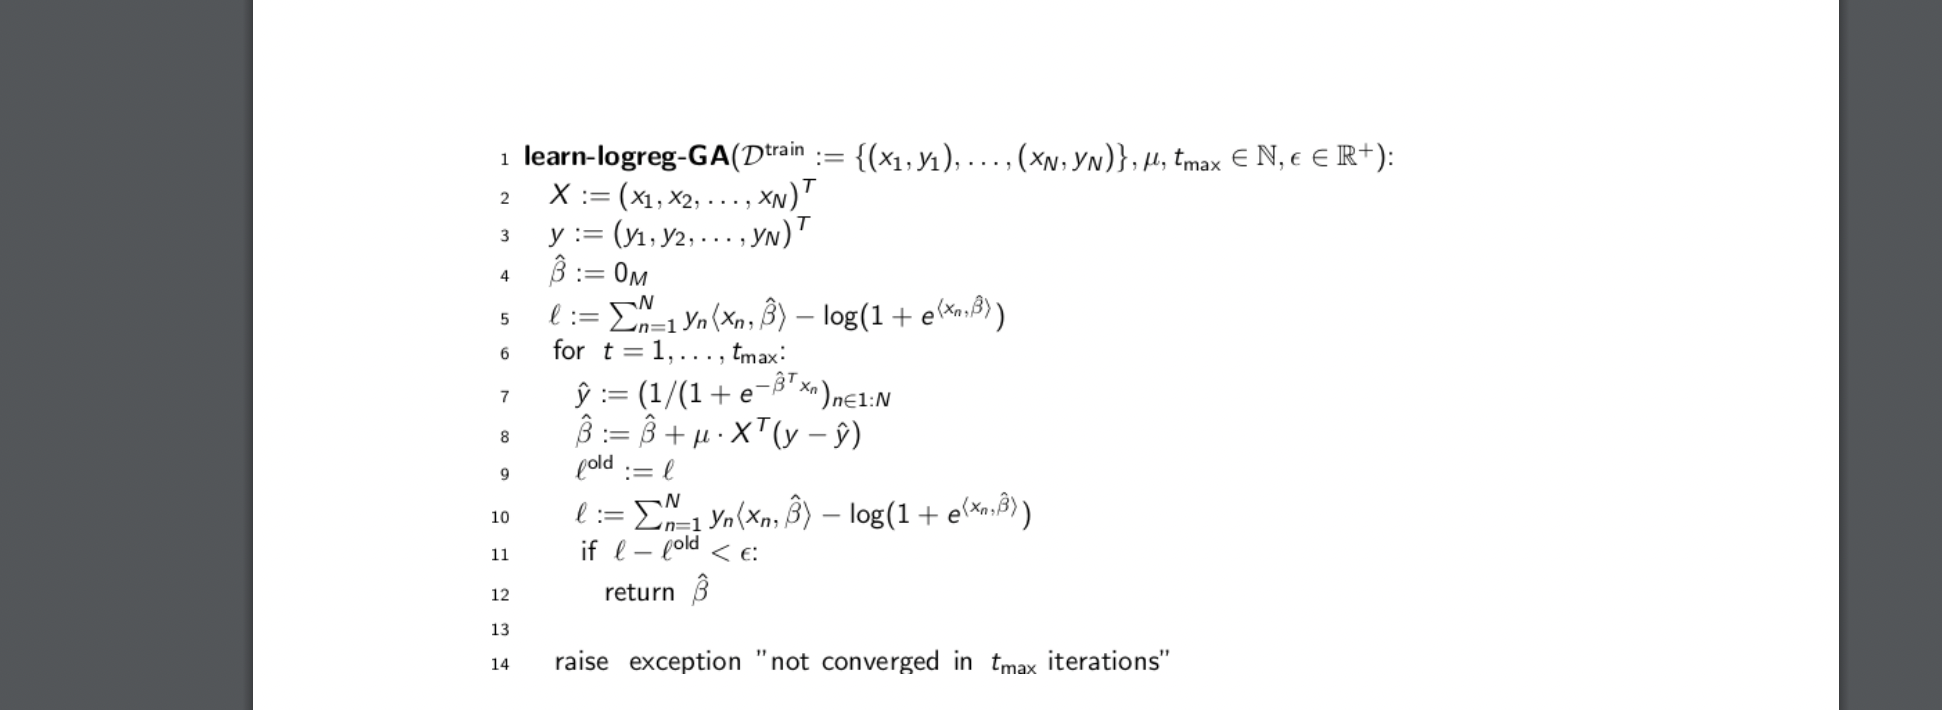
    

For calculating the losses-
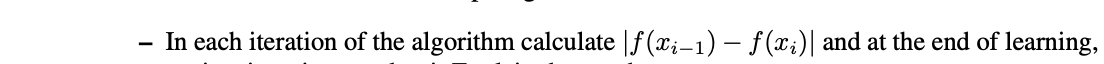




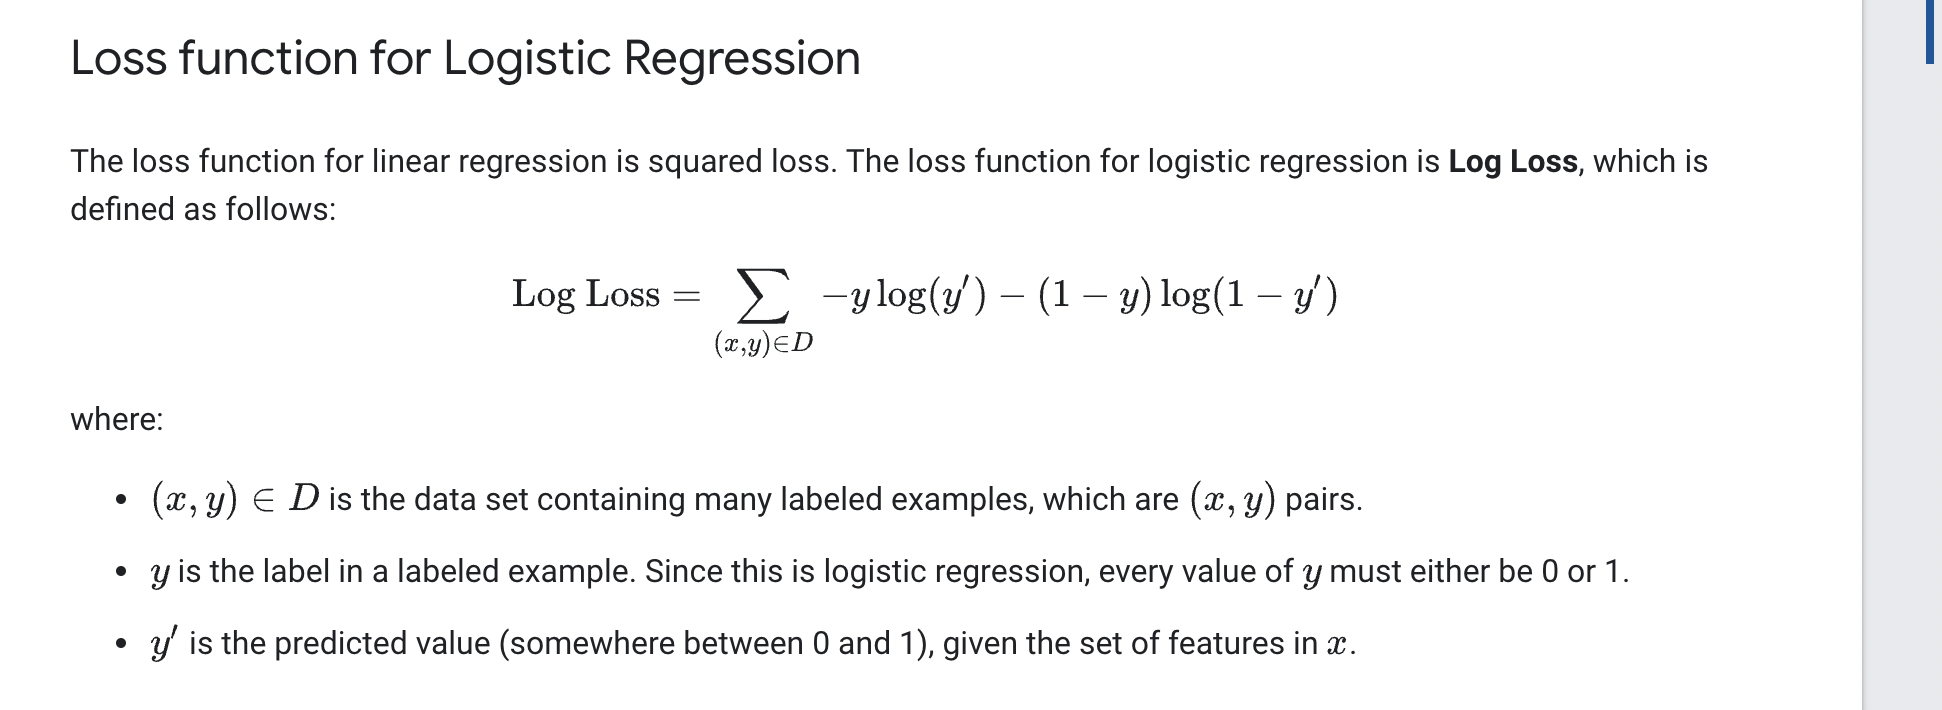

In [8]:
def LogRegression_SGA(x_train,y_train,x_test,y_test,mu,imax):
    
    beta = np.zeros(x_train.shape[1]+1).reshape(-1,1) #Initializing beta with zero
    x_train = np.insert(x_train,0,1,axis=1)           # Adding column of 1s for bias
    x_test = np.insert(x_test,0,1,axis=1)
    prev = 0
    log_loss = []
    abs_loss =[]
    l = []
    for i in range(imax):                            #Loop for each epoch 
        
        #Finding initial log likelihood for stepcontroller
        pdt = np.dot(x_train,beta)
        log = np.sum(np.dot(y_train.T,pdt)-np.log(1+ (np.exp(pdt)))) # Eqn of log likelikhood taken from algorithm
        
        #Finding initial y value for absolute loss
        y_hat_prev = 1/(1+np.exp(-np.dot(x_train,beta)))     #Eqn of y taken from algorithm
        
        for j in range(len(x_train)):    #Loop for iterating through each instance of x for stochastic gradient ascent
            
            
            x_instance = x_train[j].reshape(-1,1)       #Taking one instance of x and y
            y_instance = y_train[j]
            
            y_predicted = 1/(1+np.exp(-np.dot(beta.T, x_instance)))    #predicting y for one instance of x
            #print(y_predicted)
            beta = beta + mu * np.dot(x_instance,(y_instance - y_predicted))    #Calculating beta according to algorithm
        
        #Finding new log likelihood for stepcontroller
        pdt = np.dot(x_train,beta)
        log_new = np.sum(np.dot(y_train.T,pdt)-np.log(1+ (np.exp(pdt))))
        
        mu = steplength_bolddriver(mu,log,log_new) #Calling stepcontroller 
        
        #finding new y for absolute loss 
        y_hat = 1/(1+np.exp(-np.dot(x_train,beta)))
        
        #Finding absolute loss and appending it to list - |f(x-prev) - f(x)|
        abs_loss.append(abs(y_hat_prev - y_hat).mean())    
        
        
        #Finding y for test set to calculate log loss on validation set
        y_hat_test = 1/(1+np.exp(-np.dot(x_test,beta)))
        
        #Calculating log loss and appending to list
        loss = ((-y_test * np.log10(y_hat_test))- ((1-y_test)*(np.log10(1-y_hat_test)))).sum()
        
        
        log_loss.append(loss)
        
        
    
    return abs_loss,log_loss,l

In [9]:
#calling function for logistic regression using sga

abs_loss,log_loss,l = LogRegression_SGA(x_train,y_train,x_test,y_test,0.00001,200)

Plotting the log loss vs iterations and absolute loss vs iterations graph

200


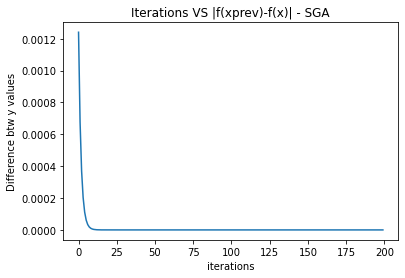

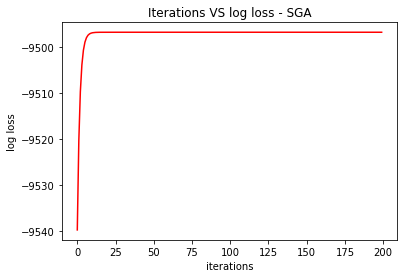

In [10]:
print(len(abs_loss))
#print((log_loss))


plt.plot(range(200),abs_loss)
#plt.plot(range(500),log_loss, color ='r')
plt.xlabel('iterations')
plt.ylabel('Difference btw y values')
plt.title('Iterations VS |f(xprev)-f(x)| - SGA')
plt.show()

plt.plot(range(200),log_loss, color ='r')
#plt.plot(range(200),l)
plt.xlabel('iterations')
plt.ylabel('log loss')
plt.title('Iterations VS log loss - SGA')
plt.show()

We observe that - the difference btw current and prev values of y is very less btw (0 and 0.025). Also the graph increases and then decreases btw this range. But the line of the graph remains close to 0.

For the log loss graph, we observe that the loss is very less i.e, -10000 initially but then decreases to 0 after 100 iterations. After which the graph remains stable. Hence it can be concluded that the log loss reaches value 0 at the end of its learning.

### Exercise 2: Implement Newton Algorithm for Logistic Regression 

Function to implement Logistic Regression using Newtons method according to the algorithm provided in the excercise sheet.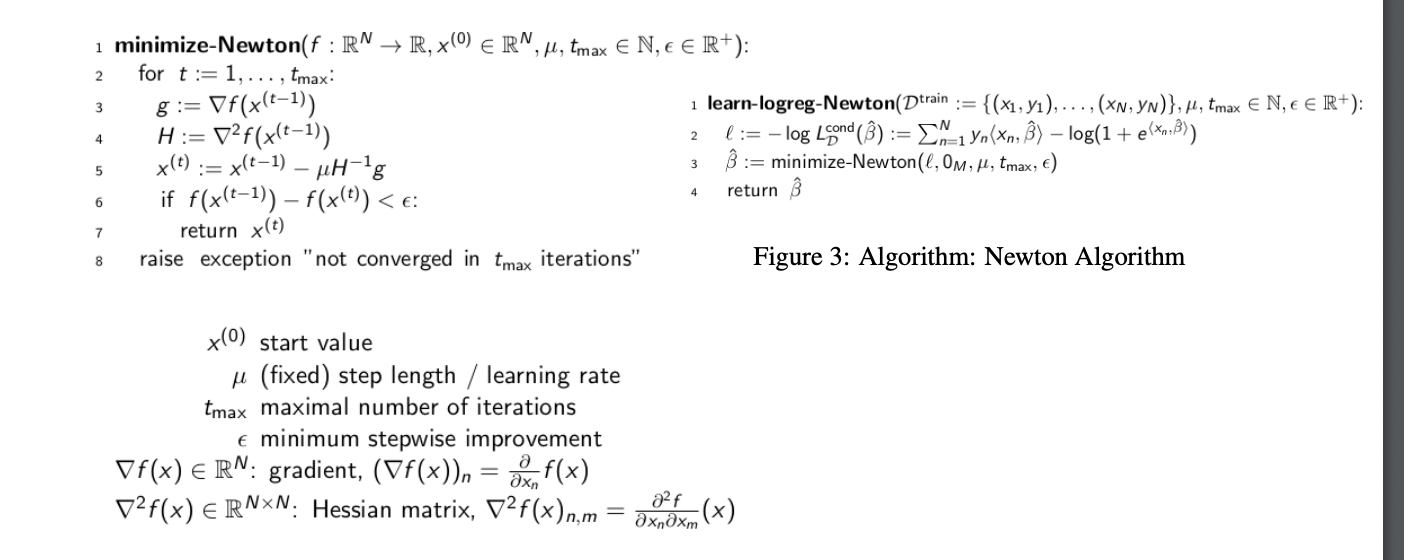

We know that in matrix form, the gradient = X.T(y - yhat)

The hessian is calculated as follows-
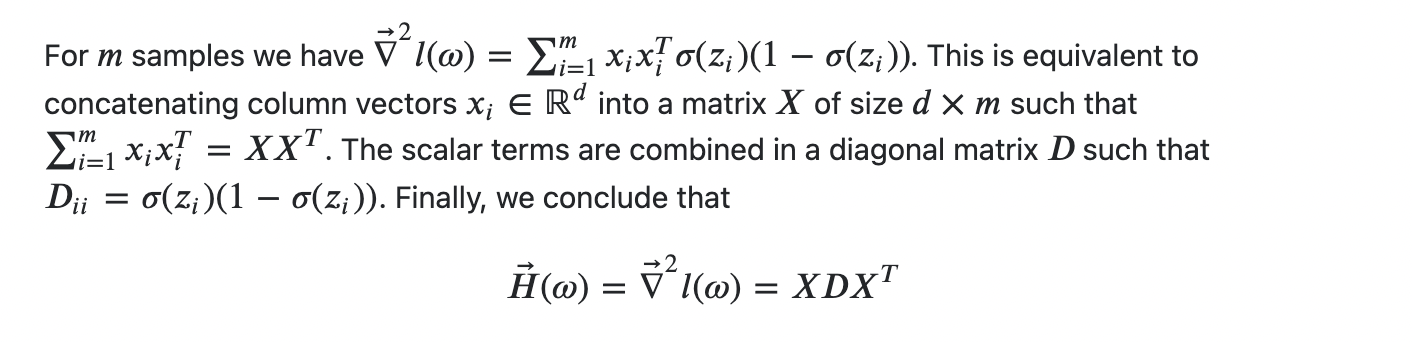

The losses for the graphs are calculated in the same way as in earlier method (using SGA)

In [11]:
def LogRegression_Newton(x_train,y_train,x_test,y_test,mu,imax):
    beta = np.zeros(x_train.shape[1]+1).reshape(-1,1)  #Initializing beta and adding bias to x
    x_train = np.insert(x_train,0,1,axis=1)
    x_test = np.insert(x_test,0,1,axis=1)
    prev = 0
    log_loss = []
    abs_loss =[]
    l = []
    
    for i in range(imax):                            # loop for executing each epoch
        
        y_predicted = 1/(1+np.exp(-np.dot(x_train,beta))) # predicting y value
        
        gradient = np.dot(x_train.T,(y_train - y_predicted))  #Calculating gradient
        diag = np.diag(y_predicted * (1 - y_predicted))       #Calculating the required diagonal matrix

        hessian = (x_train.T * diag).dot(x_train)             #calculating the hessian
        
        hessian_inv = np.linalg.inv(hessian)
        
        beta = beta + mu*(np.dot(hessian_inv,gradient))       #calculating beta values 
        
        #Computing y values on the test set to find logarithmic loss
        y_hat_test = 1/(1+np.exp(-np.dot(x_test,beta)))
        loss = ((-y_test * np.log10(y_hat_test))- ((1-y_test)*(np.log10(1-y_hat_test)))).sum() #log loss
        log_loss.append(loss) #appending loss
        
        # finding y value with new beta for calculating the absolute difference
        y_predicted_new = 1/(1+np.exp(-np.dot(x_train,beta)))
        abs_loss.append(abs(y_predicted -  y_predicted_new).mean()) #appending the loss
        
    
    return log_loss ,abs_loss

In [12]:
#calling the function to return losses 

log_loss_n, abs_loss_n = LogRegression_Newton(x_train,y_train,x_test,y_test,0.05,200)

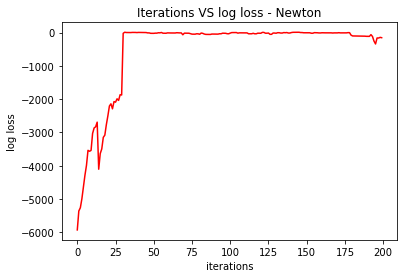

In [13]:
#plotting the log loss vs iterations graph

plt.plot(range(200),log_loss_n, color ='r')

plt.xlabel('iterations')
plt.ylabel('log loss')
plt.title('Iterations VS log loss - Newton')
plt.show()

We observe that the log loss converges to 0 after the 50 iterations. There are slight jerks but the graph remains close to 0. Initially the log loss was a -6000 but it increase to 0.

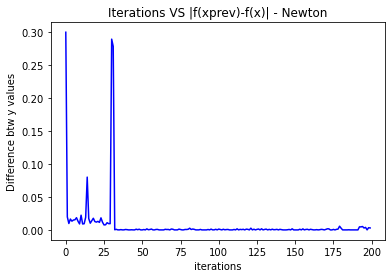

In [14]:
#Plotting the |f(xprev)-f(x)| vs iterations graph

plt.plot(range(200),abs_loss_n, color ='b')

plt.xlabel('iterations')
plt.ylabel('Difference btw y values')
plt.title('Iterations VS |f(xprev)-f(x)| - Newton')
plt.show()

We observe that the graph is intially high, has some fluctuations and then becomes stable at 0 i.e, it converges to 0 after 40 iterations. The difference btw the y values becomes close to 0 after 40 iterations. The overall loss ranges from 0.3 to 0.

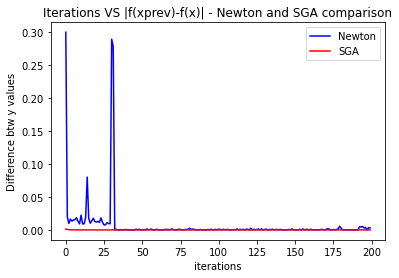

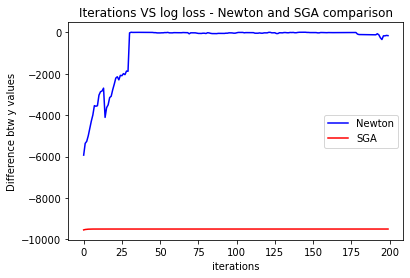

In [15]:
#Comparing the losses found through SGA and Newtons method

plt.plot(range(200),abs_loss_n, color ='b', label ="Newton")
plt.plot(range(200),abs_loss, color ='r', label = "SGA")
plt.xlabel('iterations')
plt.legend()
plt.ylabel('Difference btw y values')
plt.title('Iterations VS |f(xprev)-f(x)| - Newton and SGA comparison')
plt.show()

plt.plot(range(200),log_loss_n, color ='b', label ="Newton")
plt.plot(range(200),log_loss, color ='r', label ="SGA")
plt.xlabel('iterations')
plt.legend()
plt.ylabel('Difference btw y values')
plt.title('Iterations VS log loss - Newton and SGA comparison')
plt.show()

From the above graphs we observe that for the given mu values and epochs, the log loss of Newtons method converged to zero faster.

#### References

https://pandas.pydata.org/pandas-docs/version/0.25.2/reference/api/pandas.DataFrame.sample.html
https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training
https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function
https://numpy.org/doc/stable/reference/generated/numpy.diag.html
